In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [8]:
df = pd.read_csv('Goal1_PFD_1of3.csv', encoding = "ISO-8859-1")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
df.head()

,CID,Chamber,CalendarYear,RealCode,RealCode2,AssetSource,Asset4Date,TransactionType,GiftInfo,Location
0,N00026710,H,10,F2110,Y0000,Ameritrade MFA Financial Inc Reits,04/30/2010,Purchased,NaN,NaN
1,N00026710,H,10,F2110,Y0000,Ameritrade Spdr Tr S&P 500 Etf trust,04/30/2010,Purchased,NaN,NaN
2,N00026710,H,10,F2110,Y0000,Ameritrade Spdr High Yield,05/11/2010,UnspecifiedTransactionType,NaN,NaN
3,N00026710,H,10,F2110,F4600,Ameritrade Capstead Mortgage Corp Com,NaN,UnspecifiedTransactionType,NaN,NaN
4,N00026710,H,10,F2110,F2100,Ameritrade Annually Capital Management Inc,01/28/2010,Purchased,NaN,NaN


# Data Dictionary
- `CID`: Unique identifier for each candidate. Every candidate should have one and only one CID throughout all cycles. Recipid for candidates is based on CID.
- `Chamber`: Rerfers to chamber the report was filed with. "H" for House, "S" for Senate, "E" for executive branch
- `CalendarYear`: Calendar year that is covered by report and that this record applies to.
- `RealCode`: Industry code for AssetSource
- `RealCode2`: Industry code for AssetDescrip
- `AssetSource`: Name of asset or account as reported by filer. If assets are held within an account, the name of the account appears here. If not, the asset itself will appear here.
- `Asset4Date`: Date of Transaction
- `TransactionType`:
- `GiftInfo`: Additional information about gift
- `Location`: Combines City, State info into one field

### Sources:
1. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20pfd_assets.htm
2. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20pfd_gift.htm
3. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20pfd_trans.htm

In [17]:
df2 = pd.read_csv('Goal1_lobbying_2of3.csv', encoding = "ISO-8859-1")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
df2.head()

,Agency,AgencyID,BID,CID,CalendarYear,Client,CongNo,IID,ILID,LID,LobbyistName,OrgName,RealCode,Ultorg,schedule
0,US Senate,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB7367A7-7B60-4DED-AA2D-A94771A9EBE8,NaN,NaN,NaN,NaN,NaN
1,US House of Representatives,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB7367A7-7B60-4DED-AA2D-A94771A9EBE8,NaN,NaN,NaN,NaN,NaN
2,US House of Representatives,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,NaN,NaN,NaN,NaN,NaN
3,Dept of Health & Human Services,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,NaN,NaN,NaN,NaN,NaN
4,Centers for Disease Control & Prevention,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04366C6F-B0CE-4C28-87BF-EE1CC8A9BB41,NaN,NaN,NaN,NaN,NaN


# Data Dictionary 2
- `Agency`: The government agency lobbied
- `AgencyID`: An agency unique identifier
- `BID`: Unique identifier for bill
- `CID`: Unique identifier for each candidate. Every candidate should have one and only one CID throughout all cycles. Recipid for candidates is based on CID.
- `CalendarYear`: Calendar year that is covered by report and that this record applies to.
- `Client`: Standardized client
- `CongNo`: Congress number
- `IID`:
- `ILID`:
- `LID`: An ID assigned to each unique lobbyist.
- `LobbyistName`:
- `OrgName`:
- `RealCode`:
- `Ultorg`: The standardized parent organization for the organization listed in the Orgname field. If there is no parent identified, this field will be blank or null.
- `schedule`:

### Sources:
1. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbying.htm
2. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_lobbyists.htm
3. https://www.opensecrets.org/resources/datadictionary/Data%20Dictionary%20lob_agency.htm

In [28]:
cands = pd.read_csv('Campaign_Finance_data/cands_all.csv', encoding = "ISO-8859-1")
cands.head()

,Cycle,FECCandID,CID,FirstLastP,Party,DistIDRunFor,DistIDCurr,CurrCand,CycleCand,CRPICO,RecipCode,NoPacs
0,2000,H8MN08027,N00004523,Jerry Shuster (R),R,MN08,,,,,RN,
1,2000,H8MO01119,N00005009,Richmond A Soluade Sr (R),R,MO01,,,Y,O,RL,
2,2000,H8MO01127,N00005073,Richard E Illyes (L),L,MO01,,,,,3N,
3,2000,H8MO02125,N00005015,John A Holmes Jr (R),R,MO02,,,,,RN,
4,2000,H8MO02133,N00005078,Brian K Lundy (L),L,MO02,,,,,3N,


In [31]:
cmte = pd.read_csv('Campaign_Finance_data/cmtes_all.csv', encoding = "ISO-8859-1")
cmte.head()
#cmteID = PACID

,Cycle,CmteID,PACShort,Affiliate,Ultorg,RecipID,RecipCode,FECCandID,Party,PrimCode,Source,Sensitive,Foreign,Active
0,2000,C00000042,Illinois Tool Works,NaN,Illinois Tool Works,C00000042,PB,NaN,NaN,M2300,Hoovers,N,0,1
1,2000,C00000059,Hallmark Cards,NaN,Hallmark Cards,C00000059,PB,NaN,NaN,C1400,Hoovers,N,0,1
2,2000,C00000125,Archer for Congress Cmte,NaN,Archer for Congress Cmte,N00005822,RI,H6TX07029,R,Z1100,Rept,N,0,1
3,2000,C00000372,Maintenance of Way Employees,NaN,Maintenance of Way Employees,C00000372,PL,NaN,NaN,LT400,AFP88,N,0,1
4,2000,C00000422,American Medical Assn,American Medical Assn,American Medical Assn,C00000422,PB,NaN,NaN,H1100,AFP88,N,0,1


In [33]:
indiv = pd.read_csv('Campaign_Finance_data/indivs_all.csv', encoding = "ISO-8859-1",
                   nrows = 10000)
indiv.head()

,Cycle,FECTransID,ContribID,Contrib,RecipID,Orgname,UltOrg,RealCode,Date,Amount,...,Zip,RecipCode,Type,CmteID,OtherID,Gender,Microfilm,Occupation,Employer,Source
0,2000,3061920110006561518,e1110676533,"OLIVER, GEORGIANNA",N00005233,Metrocorp,NaN,F4500,10/19/1999,500,...,66206,DW,15,C00331066,NaN,F,20035100228,NaN,METROCORP,AYP99
1,2000,3061920110006561519,e1110933222,"TOWNSLEY, RUSSELL",N00005233,Premium Standard Farms,ContiGroup Companies,A3000,08/31/1999,500,...,66210,DW,15,C00331066,NaN,M,20035100228,NaN,CONTINENTAL GRAIN,PAC
2,2000,3061920110006561520,f0010621914,"EFFERTZ, HENRY",N00005233,Retired,NaN,X1200,10/22/1999,250,...,66208,DW,15,C00331066,NaN,M,20035100229,NaN,BEST EFFORT,Gen
3,2000,3061920110006561521,f0000101938,"WESTBROOK, DAVID",N00005233,Corporate Communications,NaN,G5000,11/17/1999,1000,...,66210,DW,15,C00331066,NaN,M,20035100229,NaN,CORPORATE COMMUNICATIONS,Gen
4,2000,3061920110006561522,f0010620683,"JOHNS, THOMAS H",N00005233,Retired,NaN,X1200,12/28/1999,250,...,66206,DW,15,C00331066,NaN,M,20035100229,NaN,RETIRED,Gen


In [34]:
pacs = pd.read_csv('Campaign_Finance_data/pacs_all.csv', encoding = "ISO-8859-1")
pacs.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cycle,FECRecNo,PACID,CID,Amount,Date,RealCode,Type,DI,FECCandID
0,2000,3062020110009922921,C00229203,N00002685,1000,08/24/2000,F3400,24K,D,H2GA08038
1,2000,3062020110011703950,C00105981,N00002577,1000,05/31/2000,F2100,24K,D,H6GA05217
2,2000,3062020110011902876,C00078451,N00006981,500,02/07/2000,D2000,24K,D,H4CA49032
3,2000,3062020110010365917,C00195263,N00006954,1000,07/27/2000,T1700,24K,D,H8CA41063
4,2000,3062020110011006932,C00108209,N00001849,500,06/19/2000,E1620,24K,D,H2MD05361


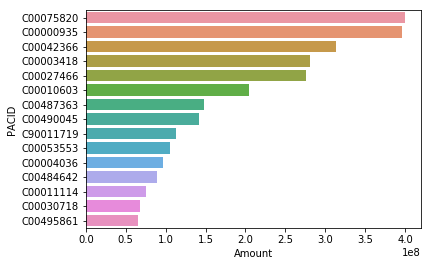

In [72]:
pacspend = pd.DataFrame(pacs.groupby('PACID')['Amount'].sum()).reset_index()

topNpacs = pacspend.nlargest(15, 'Amount').reset_index()

sns.barplot(x='Amount', y='PACID', data=topNpacs)
plt.show()